In [1]:
#visualize end_to_end dataset as wavefield

In [2]:
from models.model_utils import fetch_data_end_to_end
from generate_data import wave_util
import matplotlib.pyplot as plt
import torch

f_delta_x = .2
dx = 2.0/128.0

#get data
path = "../data/end_to_end_bp_m_200_2000.npz"
loaders = fetch_data_end_to_end([path], shuffle=False, batch_size=1)

setting up data
test data points: 180 | train data points: 20


0 ------------------------------------------------------------------------------------------------------------------------------------------------------


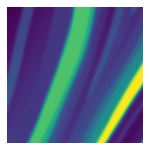

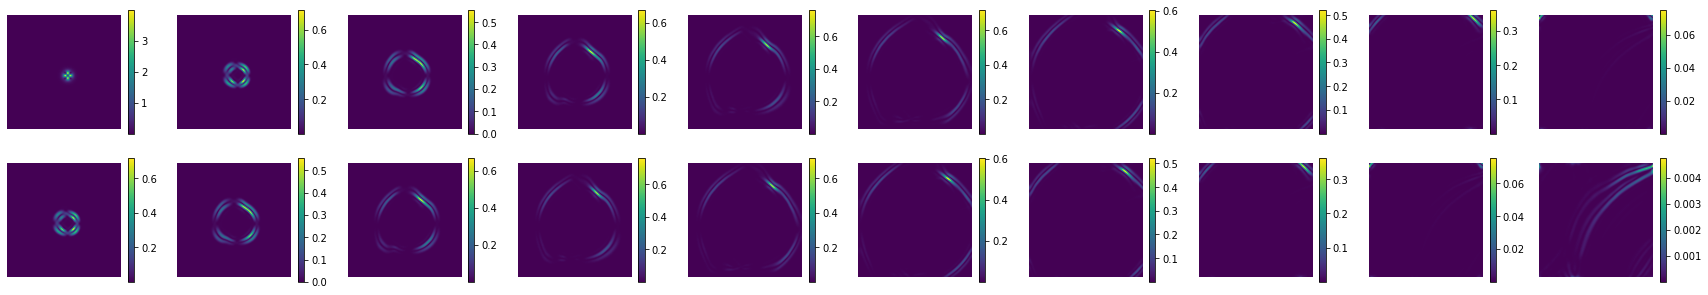

1 ------------------------------------------------------------------------------------------------------------------------------------------------------


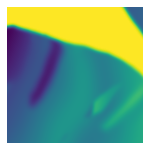

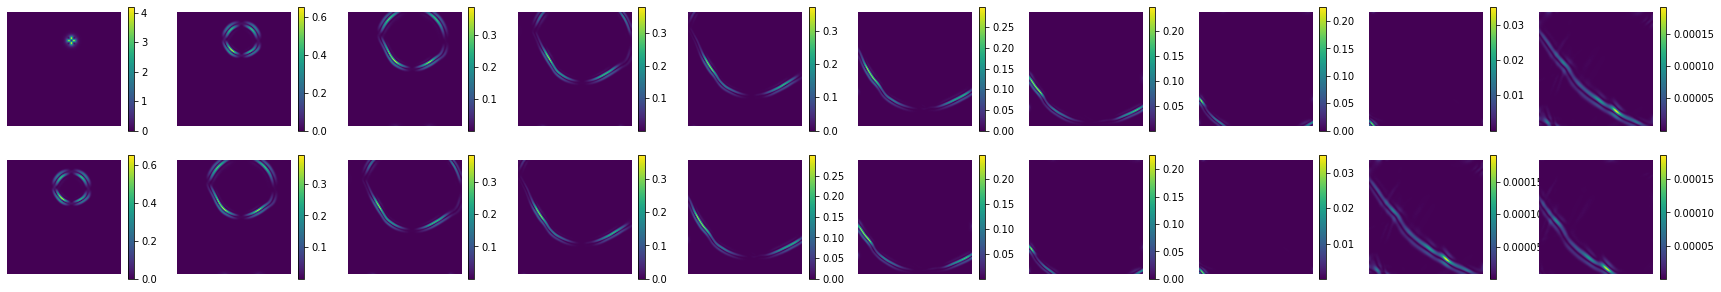

2 ------------------------------------------------------------------------------------------------------------------------------------------------------


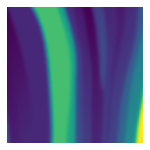

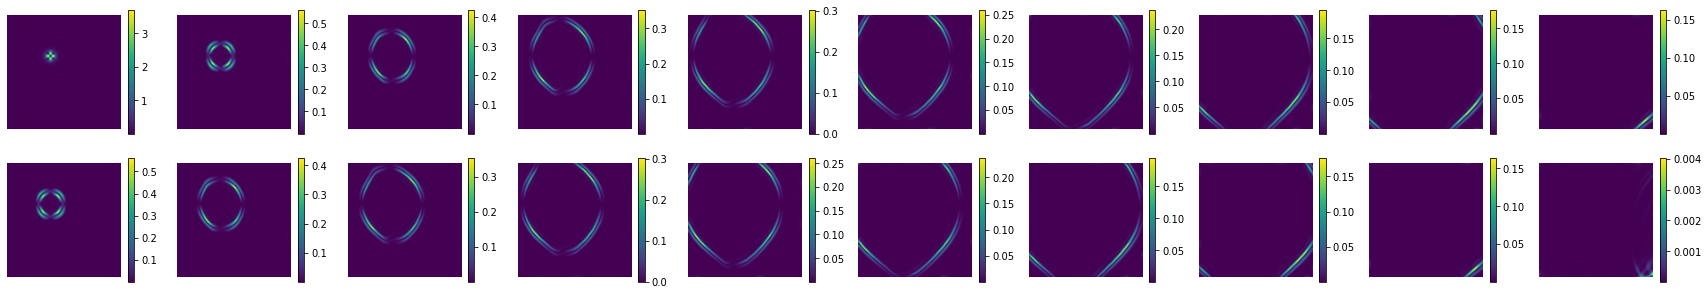

3 ------------------------------------------------------------------------------------------------------------------------------------------------------


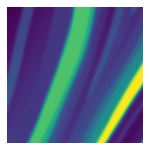

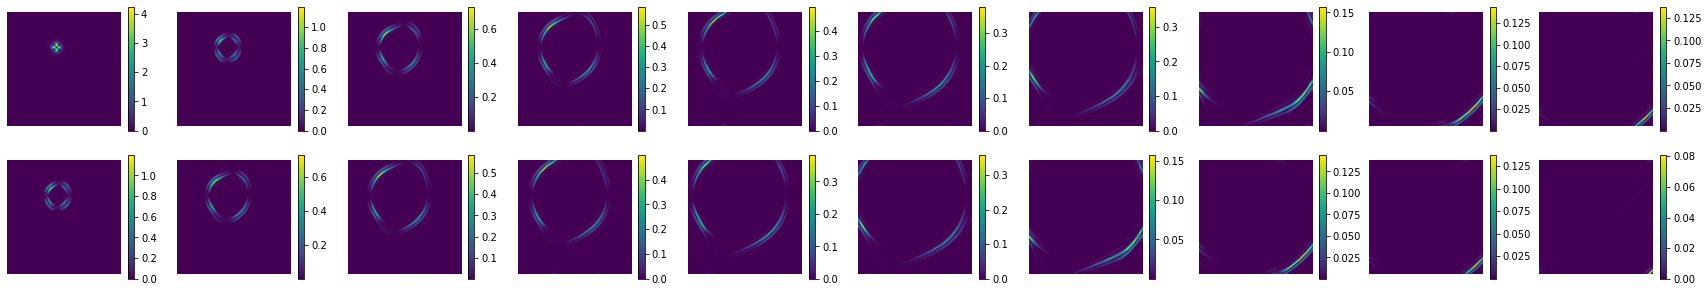

4 ------------------------------------------------------------------------------------------------------------------------------------------------------


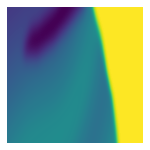

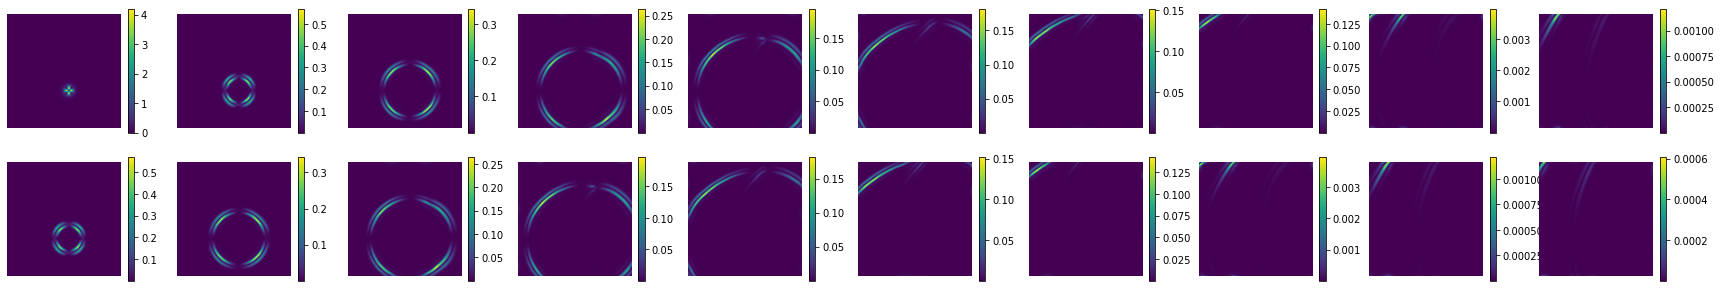

5 ------------------------------------------------------------------------------------------------------------------------------------------------------


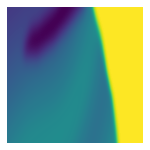

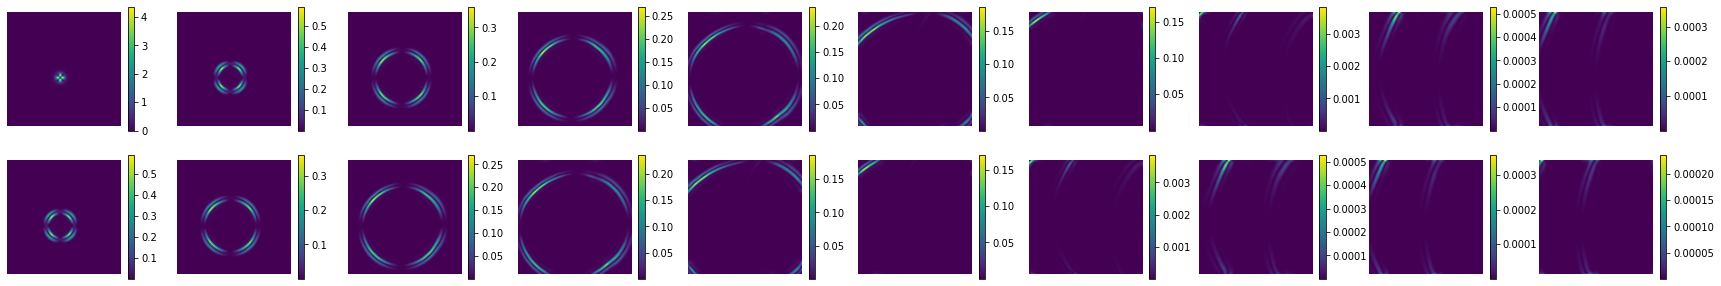

6 ------------------------------------------------------------------------------------------------------------------------------------------------------


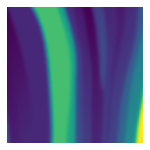

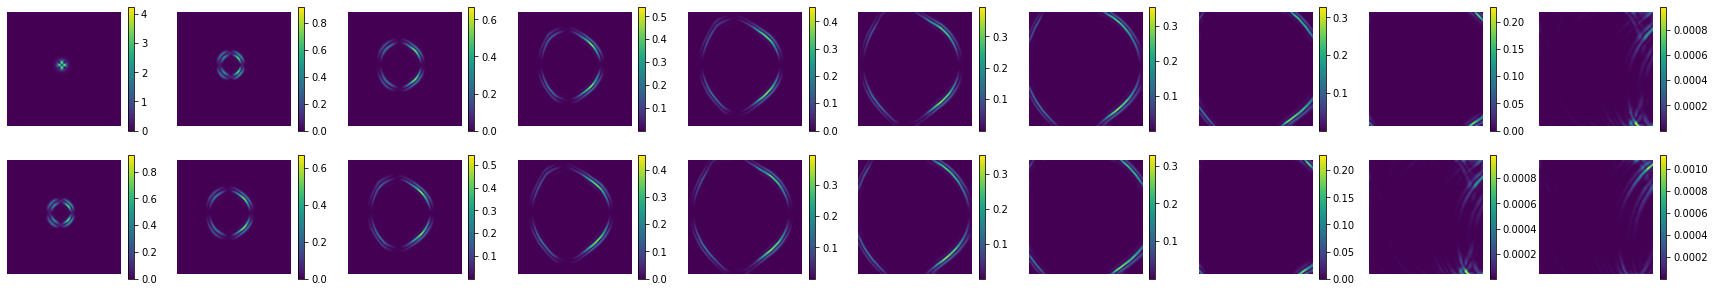

7 ------------------------------------------------------------------------------------------------------------------------------------------------------


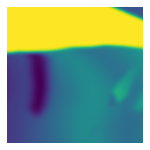

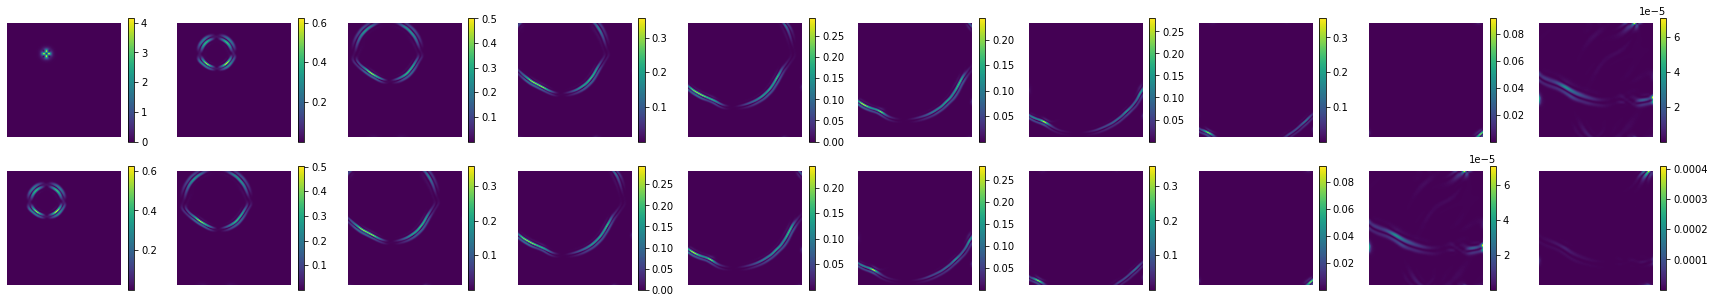

8 ------------------------------------------------------------------------------------------------------------------------------------------------------


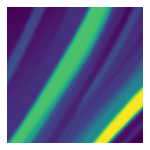

KeyboardInterrupt: 

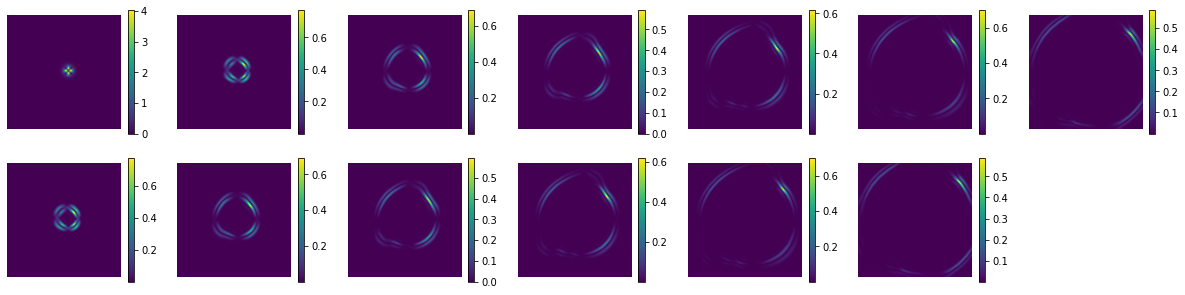

In [5]:
for loader in loaders:
    for i, data in enumerate(loader):
        print(i, "-"*150)

        input = data[0]

        # velocity visualization
        plt.figure(figsize = (2.5,2.5))
        plt.imshow(input[0, 0, 3, :, :])
        plt.axis('off')
        plt.show()
        fig = plt.figure(figsize=(30,5))

        for idx in range(10):

            #input vis
            u_x, u_y, u_t_c, vel = input[:,idx, 0, :, :], input[:,idx, 1, :, :], input[:,idx, 2, :, :], input[:,idx, 3, :, :]
            sumv = torch.sum(torch.sum(u_x))
            u, ut = wave_util.WaveSol_from_EnergyComponent_tensor(u_x, u_y, u_t_c, vel, f_delta_x, sumv)

            ax1 = fig.add_subplot(2,10,idx+1)
            pos1 = ax1.imshow(wave_util.WaveEnergyField_tensor(u[0,:,:],ut[0,:,:],vel[0,:,:],dx)*dx*dx)
            plt.colorbar(pos1)
            plt.axis('off')

            #label vis
            u_x, u_y, u_t_c, vel = input[:,idx+1, 0, :, :], input[:,idx+1, 1, :, :], input[:,idx+1, 2, :, :], input[:,idx+1, 3, :, :]
            sumv = torch.sum(torch.sum(u_x))
            u, ut = wave_util.WaveSol_from_EnergyComponent_tensor(u_x, u_y, u_t_c, vel, f_delta_x, sumv)

            ax2 = fig.add_subplot(2,10,idx+11)
            pos2 = ax2.imshow(wave_util.WaveEnergyField_tensor(u[0,:,:],ut[0,:,:],vel[0,:,:],dx)*dx*dx)
            plt.colorbar(pos2)
            plt.axis('off')


        plt.show()

In [6]:
#visualize absorbing bc

In [1]:
import numpy as np
import torch
from generate_data.wave_propagation import velocity_verlet_tensor
import matplotlib.pyplot as plt
from generate_data import wave_util

total_time, delta_t_star = 1, .2  #total time of elapses, stepsize per elapse
dx = 2.0/128.0
dt = dx / 20  #discretization in time (fine discretization, fine solver)
n_snaps = round(total_time / delta_t_star)  #number of snapshots
xx, yy = torch.meshgrid(torch.linspace(-1, 1, 128), torch.linspace(-1, 1, 128))
vel = torch.ones([np.size(xx,axis=1),np.size(yy,axis=0)])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


0 ------------------------------


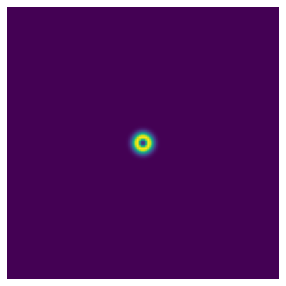

1 ------------------------------


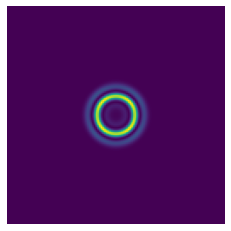

2 ------------------------------


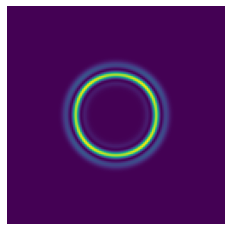

3 ------------------------------


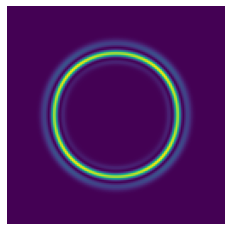

4 ------------------------------


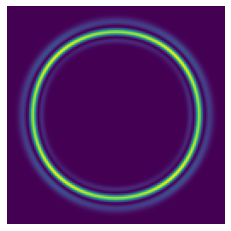

5 ------------------------------


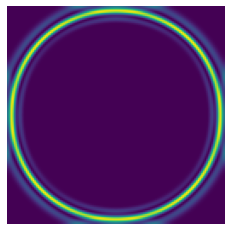

6 ------------------------------


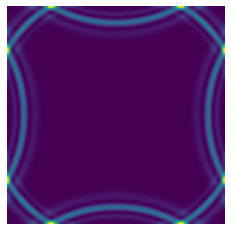

7 ------------------------------


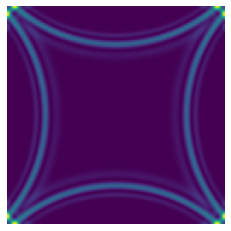

8 ------------------------------


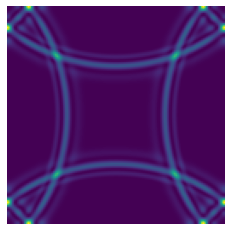

9 ------------------------------


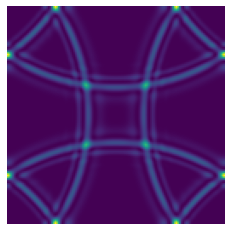

In [3]:
# print("velocity")
# plt.imshow(vel)
# plt.show()

u0 = torch.exp(-250 * ((xx - 0) ** 2 + (yy - 0) ** 2))
ut0 = torch.zeros([128,128])

fig = plt.figure(figsize=(30,5))
for j in range(10):
    print(j,"-"*30)
    #ax2 = fig.add_subplot(1,n_snaps,j+1)
    #pos2 = ax2.imshow(wave_util.WaveEnergyField_tensor(u0,ut0,vel,dx))
    plt.imshow(wave_util.WaveEnergyField_tensor(u0,ut0,vel,dx))
    plt.axis('off')
    plt.show()

    u0, ut0 = velocity_verlet_tensor(u0,ut0,vel,dx,dt,delta_t_star, boundary_c='absorbing')

SyntaxError: invalid syntax (<ipython-input-4-2e7642ab5f0e>, line 10)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


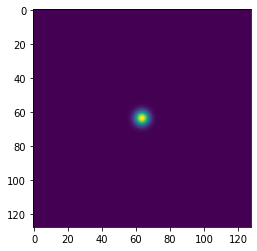

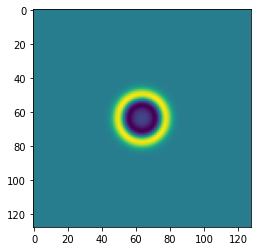

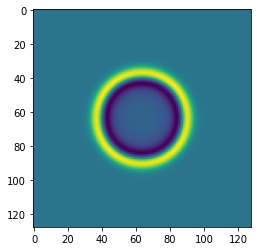

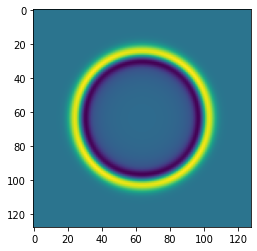

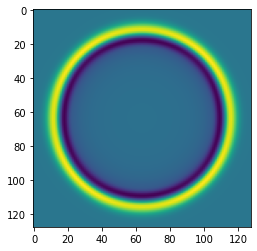

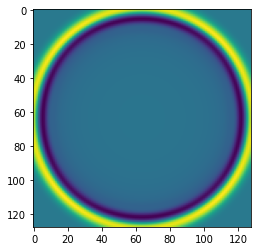

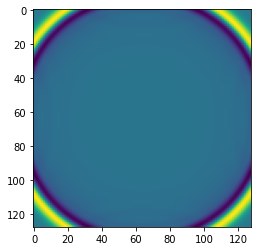

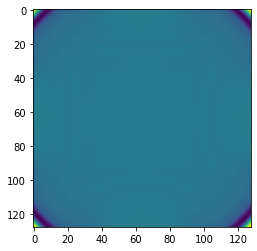

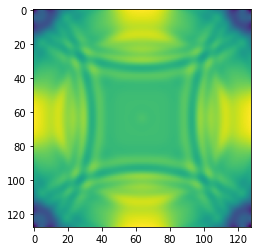

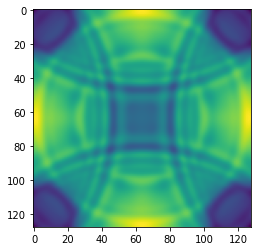

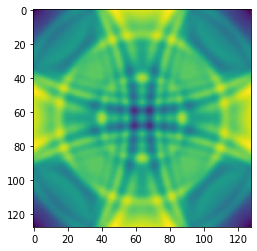

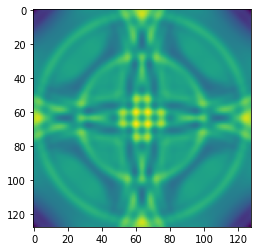

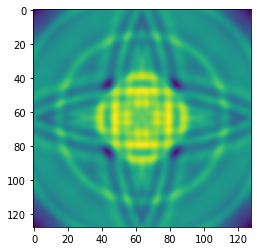

In [1]:
import matplotlib.pyplot as plt
from generate_data import wave_propagation as wprop
import torch

xx,yy = torch.meshgrid(torch.linspace(-1, 1, 128), torch.linspace(-1, 1, 128))
u=torch.exp(-250 * ((xx) ** 2 + (yy) ** 2))
ut=torch.zeros([128,128])
vel = torch.ones(128, 128)

dx = 2.0/128.0
dt = dx / 20
cT = .2

for i in range(13):
    plt.imshow(u)
    plt.show()
    u, ut = wprop.velocity_verlet_tensor(u, ut, vel,dx,dt,cT,boundary_c='absorbing')